In [17]:
import pandas as pd
import os
path = "../Data/Curated"
gp_all = os.listdir(path)
gp_all.remove('.gitkeep')

### Let's compare the first and last race from the data

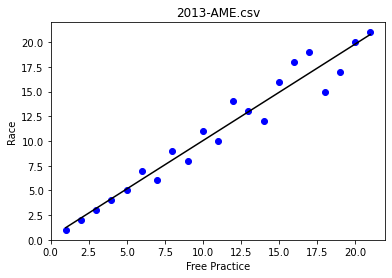

r^2: 0.9537932197672457


In [18]:
data = pd.read_csv(f"{path}/{gp_all[0]}")  # this is 2013 CoTA

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

X = data[["fp"]]
y = data["race"]
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='b')
plt.title(gp_all[0])
plt.xlabel("Free Practice")
plt.ylabel("Race")
plt.plot(X, reg.predict(X), color='k')
plt.show()
print(f'r^2: {reg.score(X, y)}')

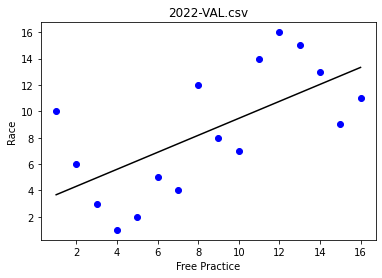

r^2: 0.41488754325259514


In [20]:
data = pd.read_csv(f"{path}/{gp_all[-1]}")  # this is 2022 Valencia

X = data[["fp"]]
y = data["race"]
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='b')
plt.title(all[-1])
plt.xlabel("Free Practice")
plt.ylabel("Race")
plt.plot(X, reg.predict(X), color='k')
plt.show()
print(f'r^2: {reg.score(X, y)}')

It seems like there is a massive difference between free practice and race performance in 2022 compared to 2013. Let's see how they progress over the years.

In [41]:
YEAR_START = 2013
YEAR_END = 2022

years = list(range(YEAR_START, YEAR_END + 1))
scores = [[] for i in range(len(years))]  # coefficient of determination of the linear regression for each year

# find r^2 for every gp
for gp in gp_all:
    try:
        data = pd.read_csv(f"{path}/{gp}")
        year = int(gp[:4])
        X = data[["fp"]]
        y = data["race"]
        reg = LinearRegression().fit(X, y)
        scores[year - YEAR_START].append(reg.score(X, y))
    except:
        # seems like some of the csv data failed to be produced, so we'll ignore them here
        # (no biggie, there's only 2 of em out of 160ish)
        pass

# find mean r^2 for every year
import statistics as stats
scores = [stats.mean(scores[i]) for i in range(len(years))]
data = pd.DataFrame(data={"year": years, "rsquared": scores})
data

,year,rsquared
0,2013,0.852231
1,2014,0.723085
2,2015,0.750914
3,2016,0.400408
4,2017,0.482021
5,2018,0.520160
6,2019,0.524745
7,2020,0.456584
8,2021,0.357497
9,2022,0.395439


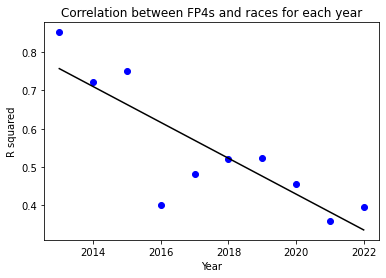

r^2: 0.69727297286625


In [46]:
X = data[["year"]]
y = data["rsquared"]
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='b')
plt.title("Correlation between FP4s and races for each year")
plt.xlabel("Year")
plt.ylabel("R squared")
plt.plot(X, reg.predict(X), color='k')
plt.show()
print(f'r^2: {reg.score(X, y)}')